In [1]:
import deepxde as dde
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from naca4digit_airfoil import Naca4DigitAirfoil
import pandas as pd
from scipy.interpolate import griddata

/Users/ggito/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
cfd_df = pd.read_csv('cfd_data.txt', delimiter=',')

In [3]:
x_min = -0.25
x_max = 0.75
y_min = -0.25
y_max = 0.25

In [4]:
L = 0.05

In [5]:
airfoil = Naca4DigitAirfoil(c=L, M=2, P=4, T=12, a=0, offset_x=0, offset_y=0)

In [6]:
df = pd.read_csv('./BreezeAccurateHorizon075/results.csv')

In [7]:
x_loaded = df['x'].values
y_loaded = df['y'].values
u_loaded = df['u'].values
v_loaded = df['v'].values
p_loaded = df['p'].values

In [8]:
X, Y = np.meshgrid(np.linspace(df['x'].min(), df['x'].max(), 2000), 
                             np.linspace(df['y'].min(), df['y'].max(), 2000))

In [9]:
U = griddata((df['x'], df['y']), df['u'], (X, Y), method='linear')
V = griddata((df['x'], df['y']), df['v'], (X, Y), method='linear')
P = griddata((df['x'], df['y']), df['p'], (X, Y), method='linear')

In [10]:
x_min, x_max, y_min, y_max = -0.25, 0.75, -0.25, 0.25

def set_domain_lims(ax):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def set_zoomed_domain_lims(ax):
    ax.set_xlim(x_min/2, x_max/2)
    ax.set_ylim(y_min/2, y_max/2)

def set_labels(ax):
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

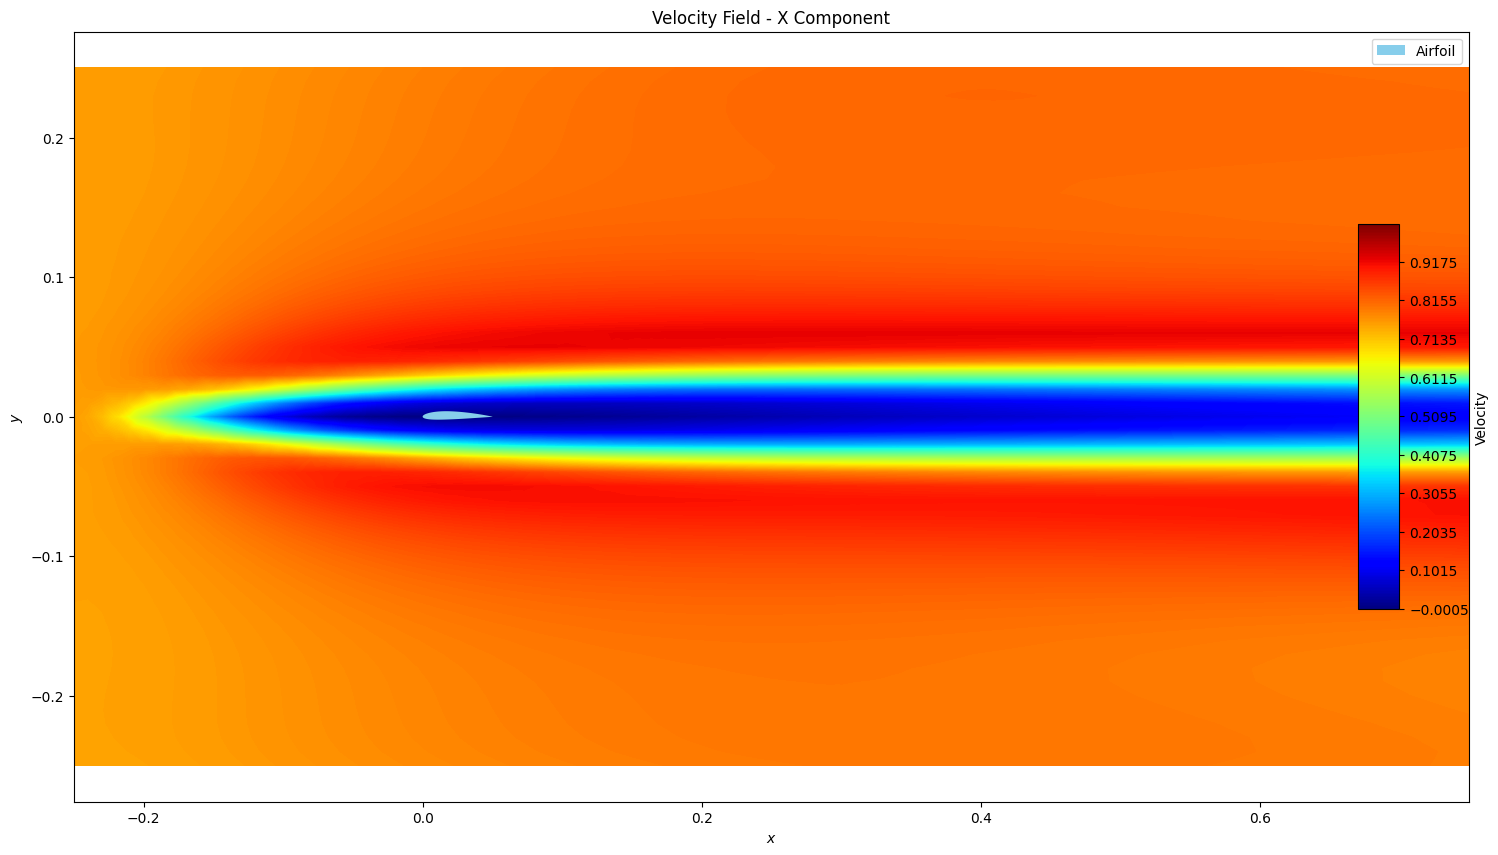

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(U.min(), 1.1*U.max(), 0.001)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=5)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('u.png', dpi=300)
plt.show()

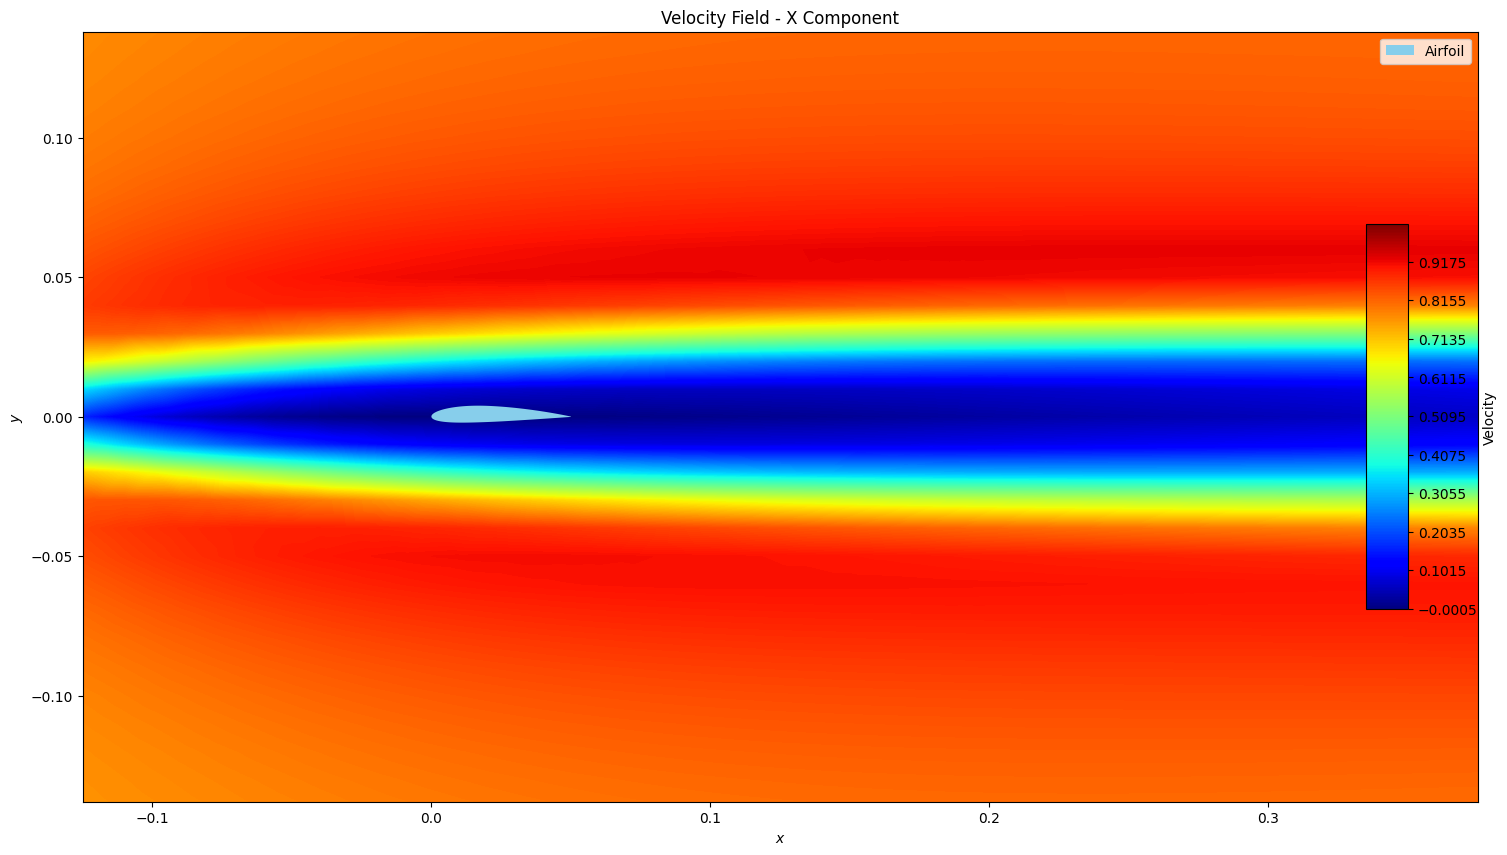

In [12]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(U.min(), 1.1*U.max(), 0.001)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=5)
# cbar = fig.colorbar(cp, cax=cbaxes, ticks=[i for i in range(int(U.min()), int(U.max()) + 1, 2)])
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('u_zoomed.png', dpi=300)
plt.show()

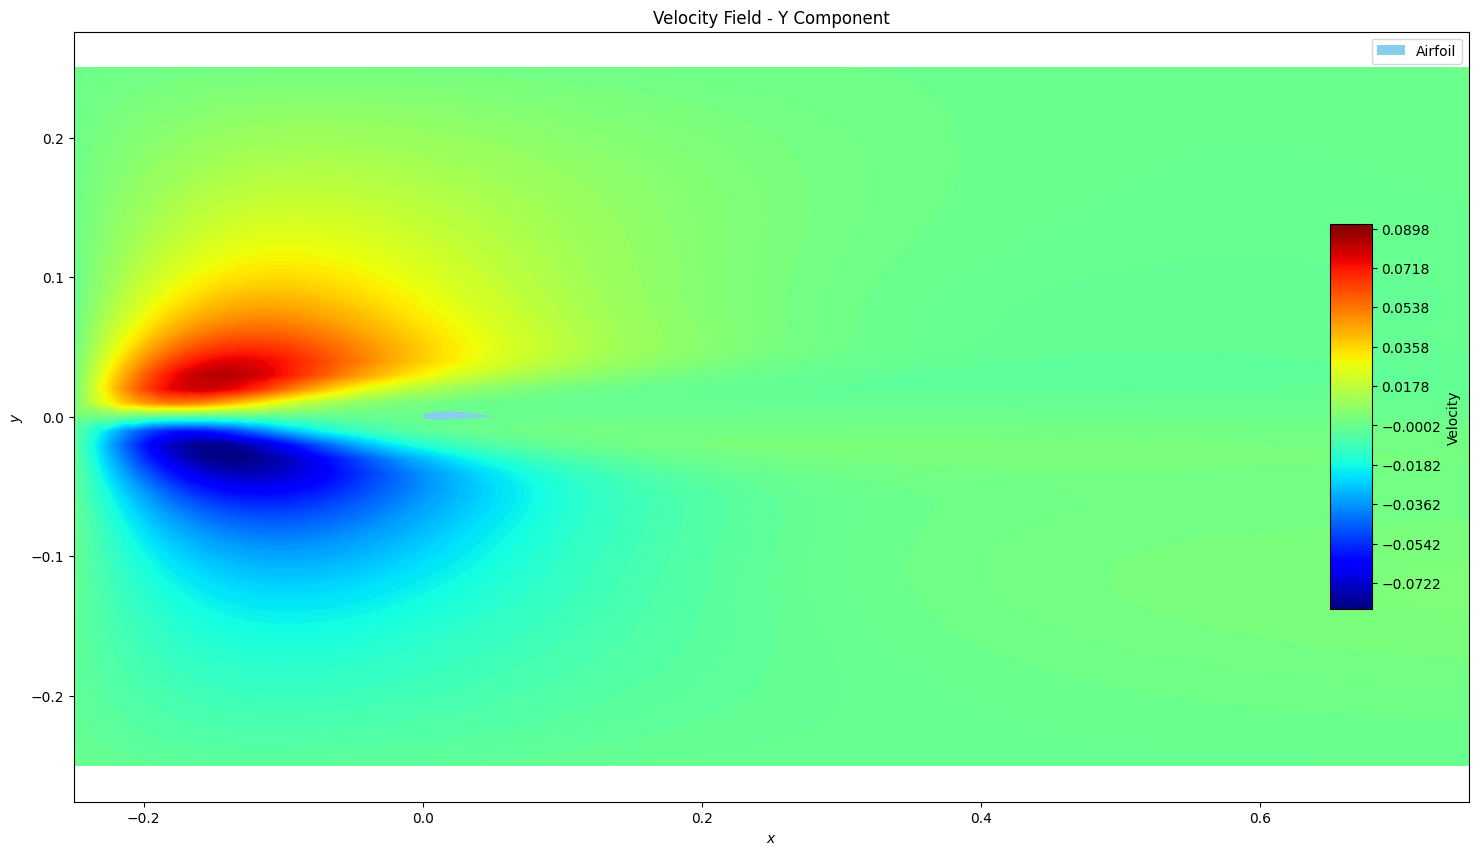

In [13]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(V.min(), 1.1*V.max(), 0.001)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=7)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('v.png', dpi=300)
plt.show()

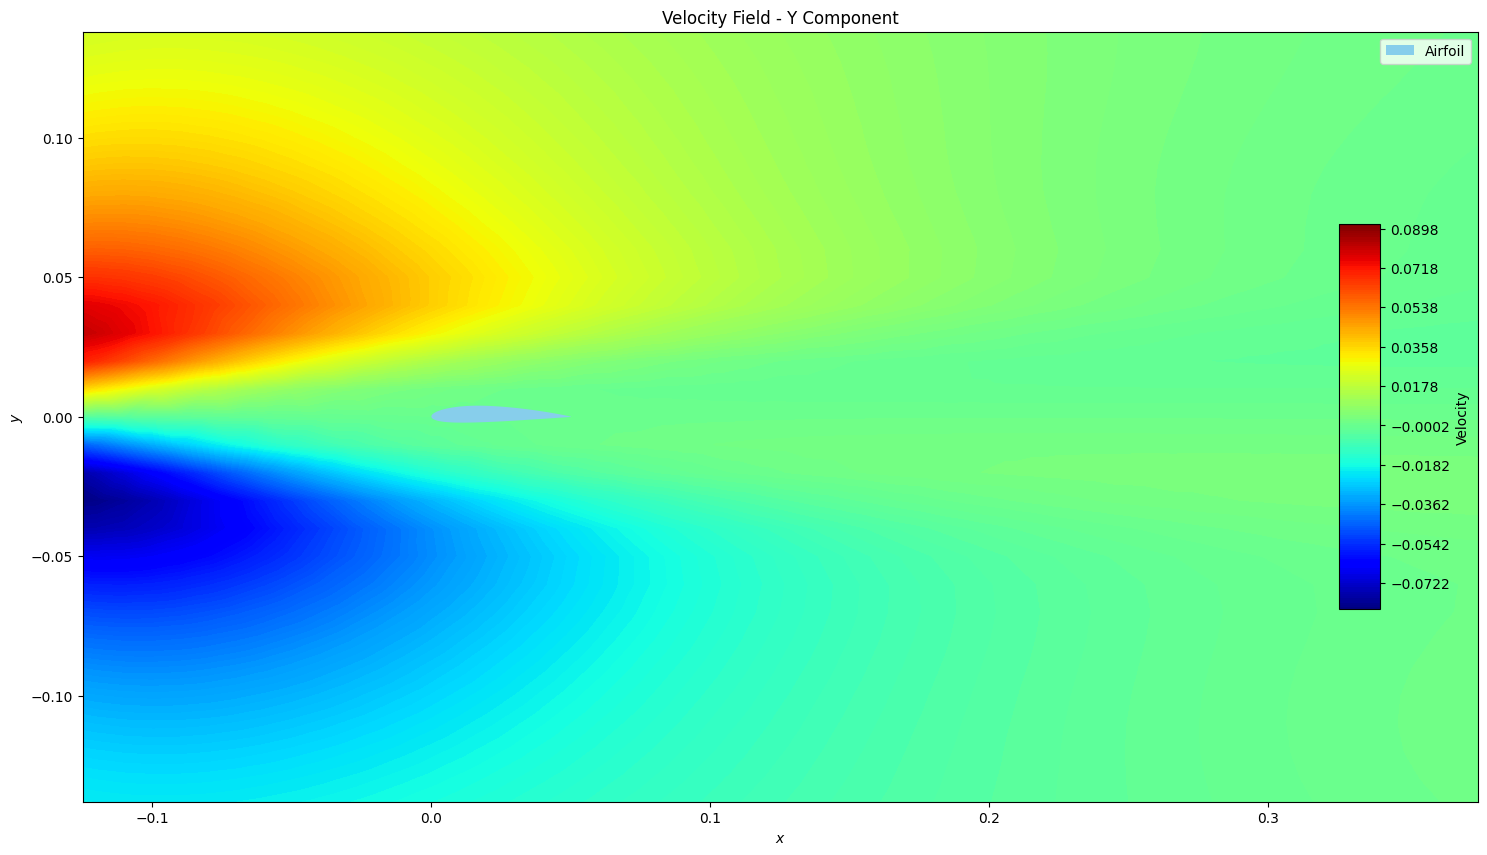

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(V.min(), 1.1*V.max(), 0.001)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=7)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('v_zoomed.png', dpi=300)
plt.show()

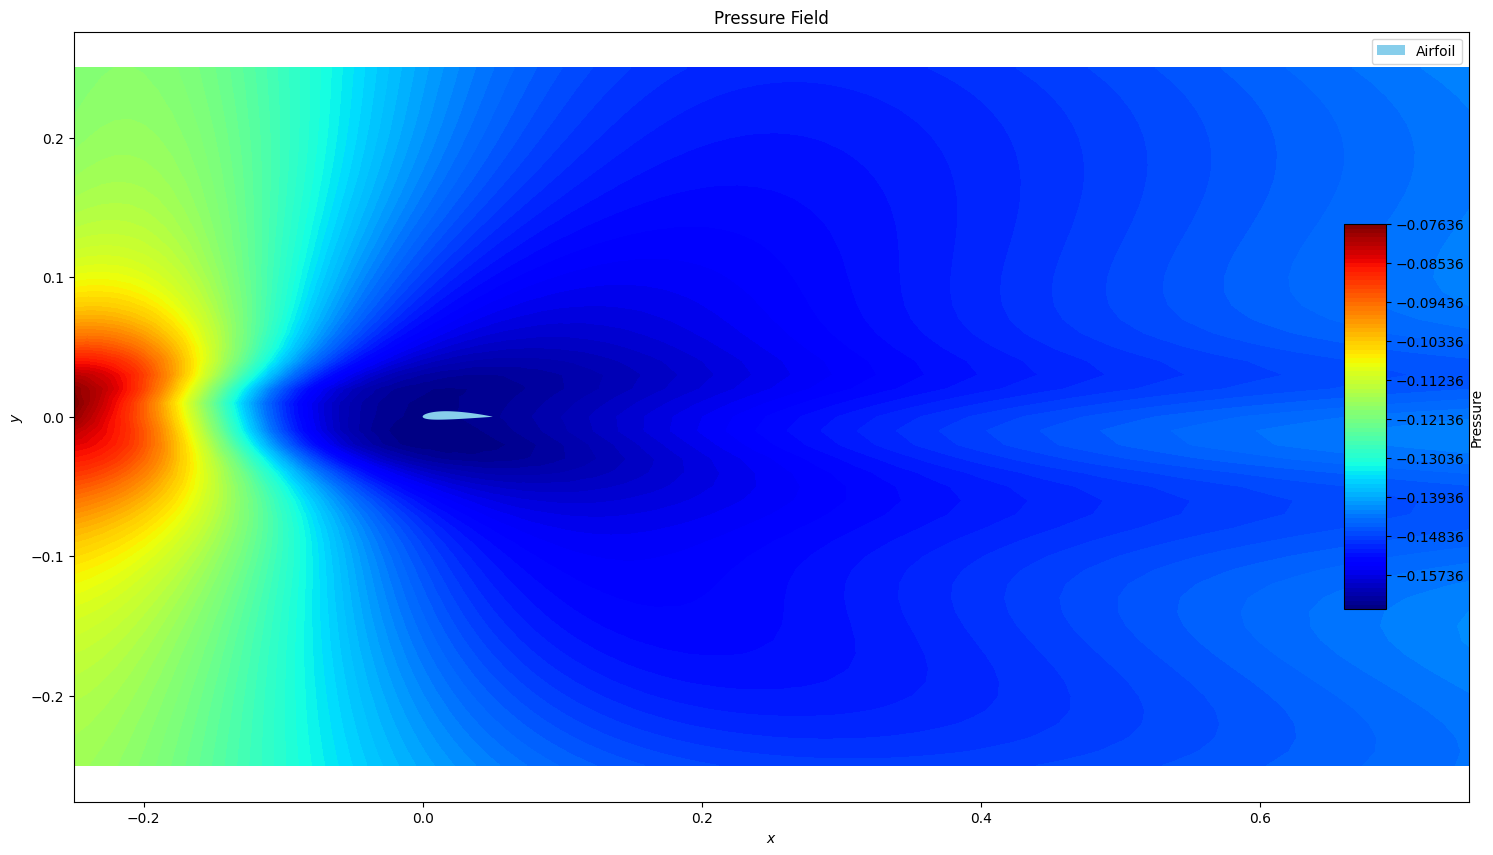

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(P.min(), P.max(), 0.001)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
set_labels(ax)
ax.set_title('Pressure Field')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=6)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure')
set_domain_lims
ax.grid(False)
plt.savefig('p.png', dpi=300)
plt.show()

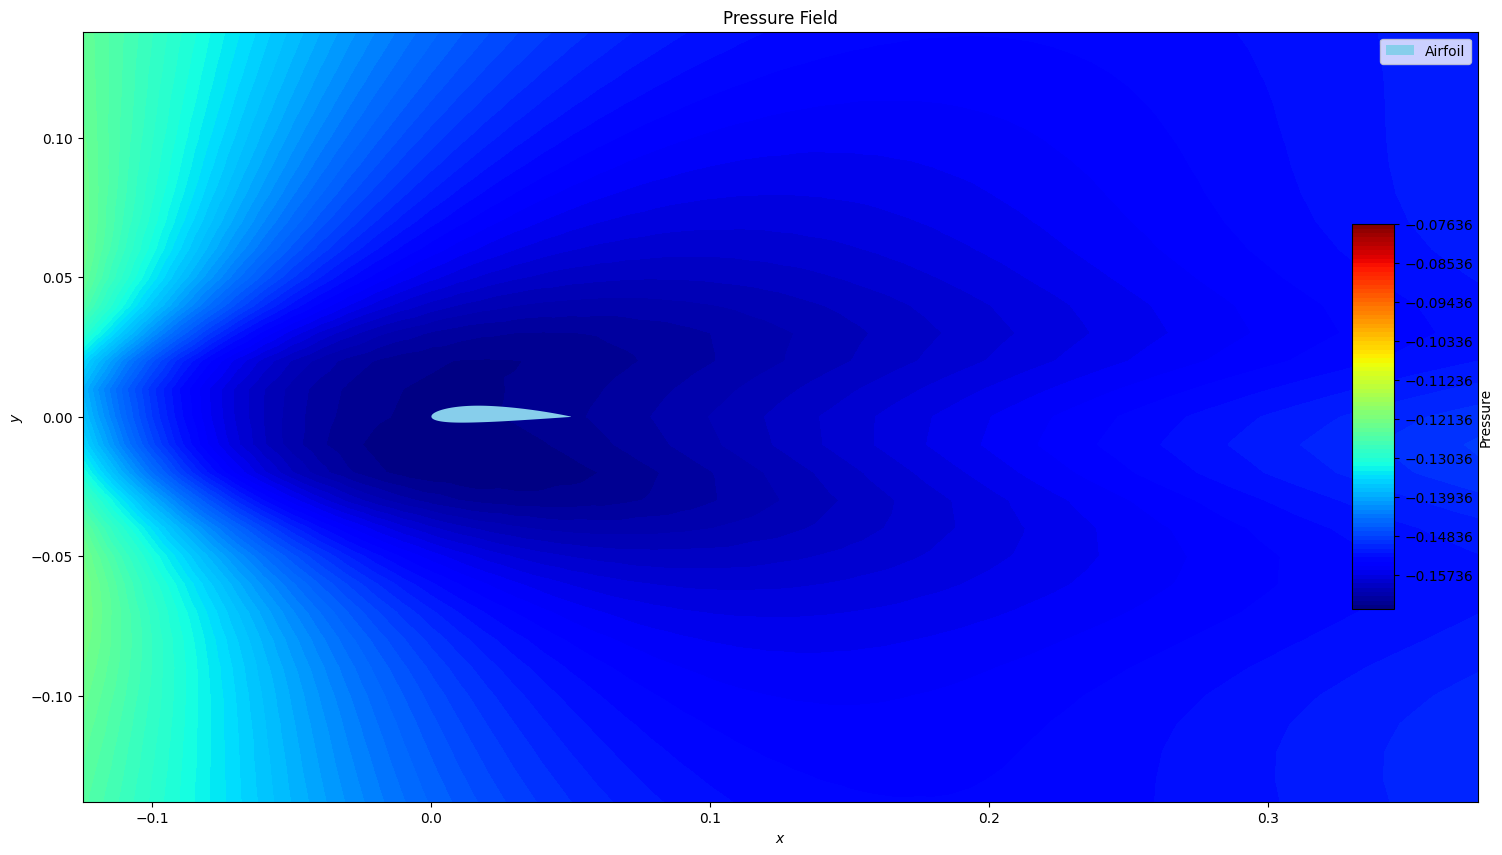

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(P.min(), P.max(), 0.001)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
set_labels(ax)
ax.set_title('Pressure Field')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=6)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('p_zoomed.png', dpi=300)
plt.show()

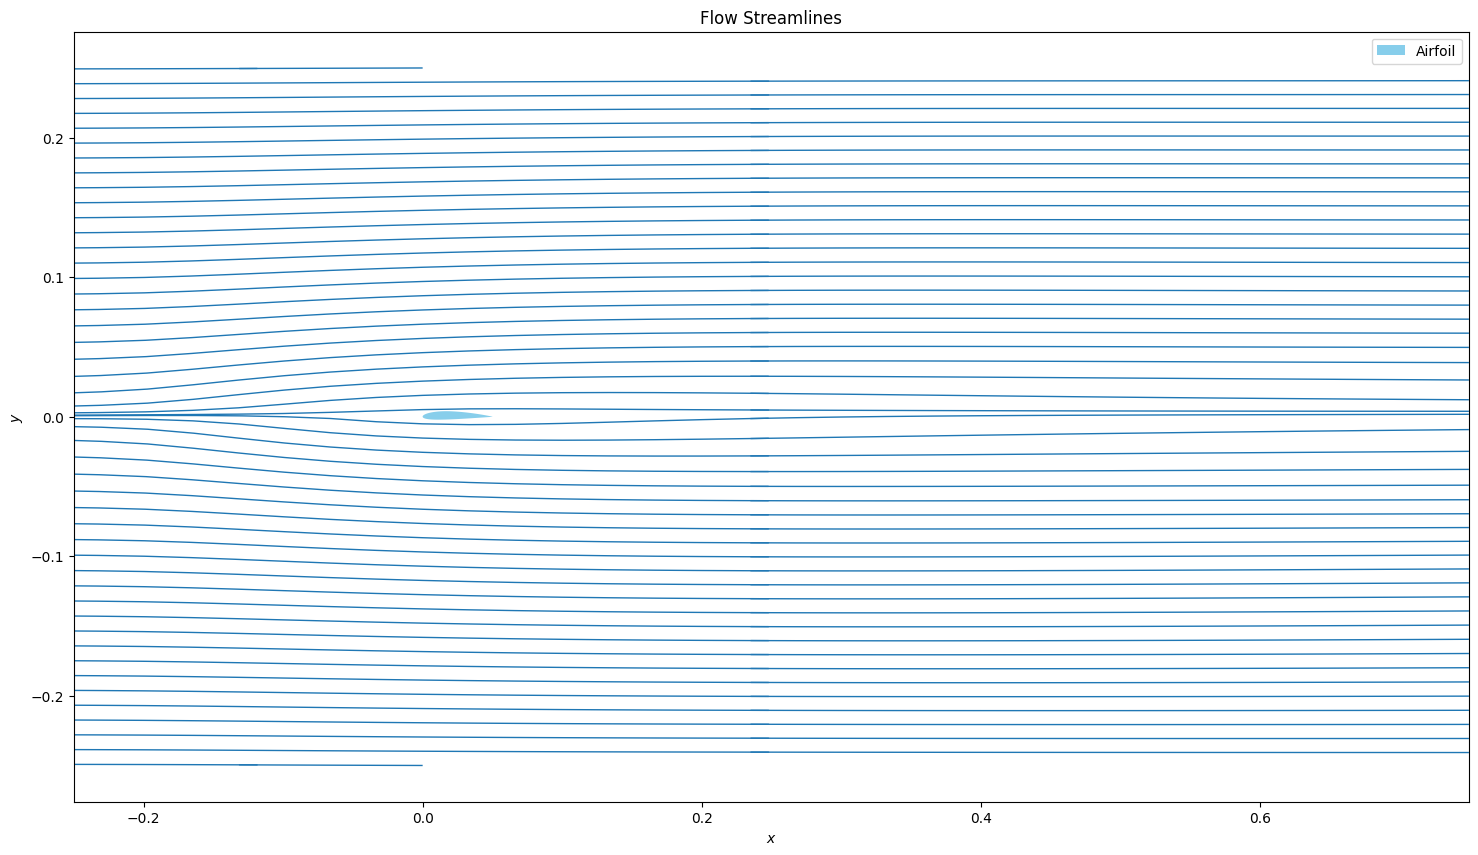

In [17]:
fig, ax = plt.subplots(figsize=(18, 10))
num_points = 50
y_start = y_min
y_end = y_max
start_points = np.zeros((num_points, 2))
start_points[:, 1] = np.linspace(y_start, y_end, num_points)
start_points[:, 0] = 0
ax.streamplot(X, Y, U, V, start_points=start_points, linewidth=1, arrowsize=1, arrowstyle='-', broken_streamlines=False)
set_labels(ax)
ax.set_title('Flow Streamlines')
airfoil.plot(ax)
set_domain_lims(ax)
ax.grid(False)
plt.savefig('flow.png', dpi=300)
plt.show()

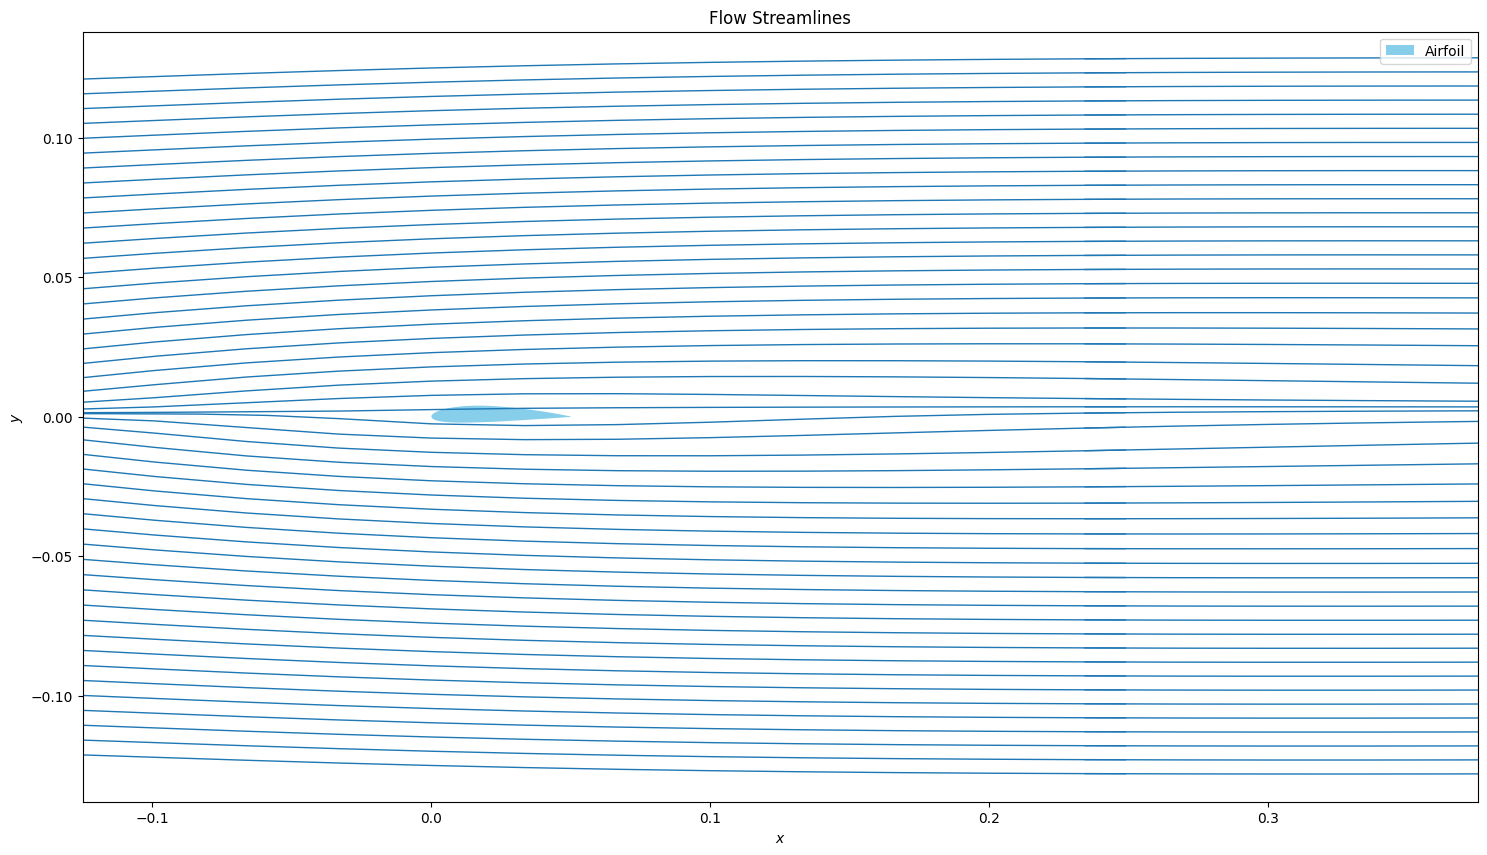

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))
num_points = 50
y_start = y_min/2
y_end = y_max/2
start_points = np.zeros((num_points, 2))
start_points[:, 1] = np.linspace(y_start, y_end, num_points)
start_points[:, 0] = 0
ax.streamplot(X, Y, U, V, start_points=start_points, linewidth=1, arrowsize=1, arrowstyle='-', broken_streamlines=False)
set_labels(ax)
ax.set_title('Flow Streamlines')
airfoil.plot(ax)
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('flow_zoomed.png', dpi=300)
plt.show()